In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (2).csv


In [ ]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (500, 10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,Passenger 1,male,28.7,1,2,TKT00001,22.87
1,2,1,3,Passenger 2,female,50.2,1,0,TKT00002,61.20
2,3,1,2,Passenger 3,female,20.5,2,2,TKT00003,4.20
3,4,0,3,Passenger 4,female,55.2,0,1,TKT00004,46.89
4,5,0,3,Passenger 5,female,29.4,1,2,TKT00005,4.00


In [ ]:
# Overview of the dataset
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handle missing values (example: fill missing 'Age' with median)
df['Age'] = df['Age'].fillna(df['Age'].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  500 non-null    int64  
 1   Survived     500 non-null    int64  
 2   Pclass       500 non-null    int64  
 3   Name         500 non-null    object 
 4   Sex          500 non-null    object 
 5   Age          500 non-null    float64
 6   SibSp        500 non-null    int64  
 7   Parch        500 non-null    int64  
 8   Ticket       500 non-null    object 
 9   Fare         500 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 39.2+ KB
None

Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   500.000000  500.000000

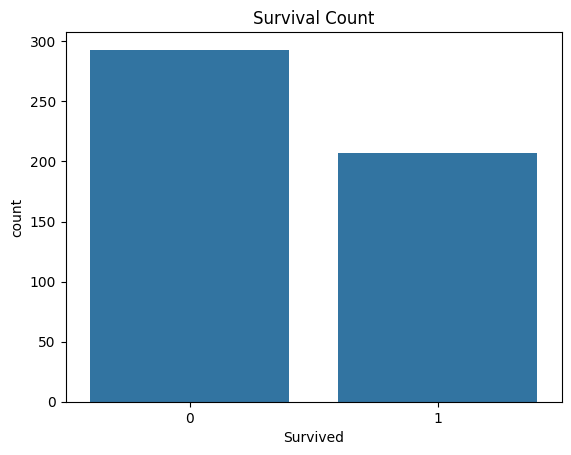

In [ ]:
# Survival count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()




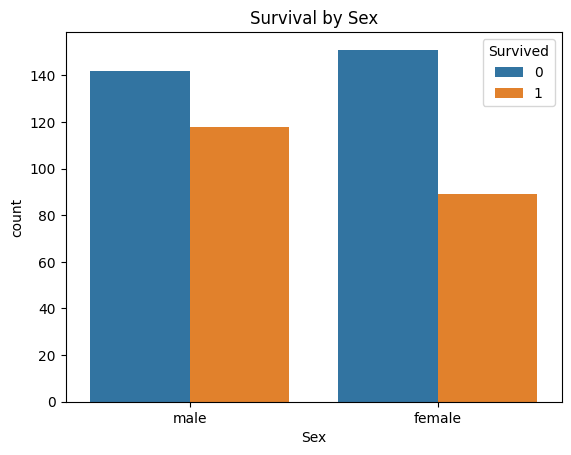

In [ ]:
# Survival rate by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

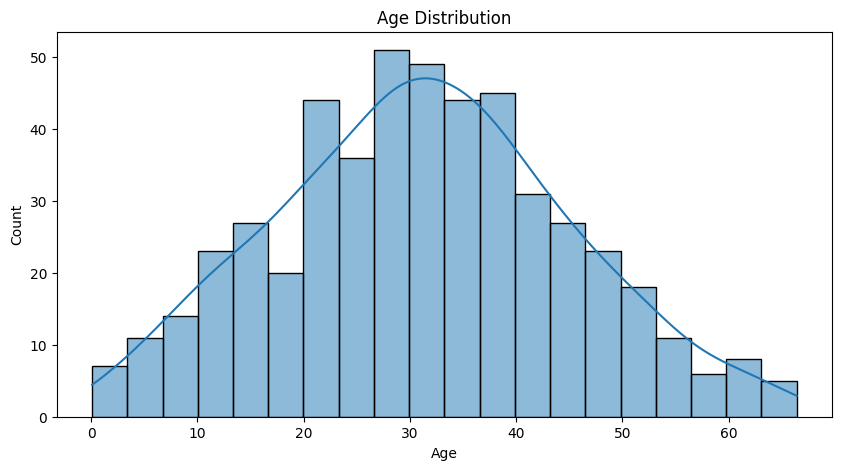

In [ ]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

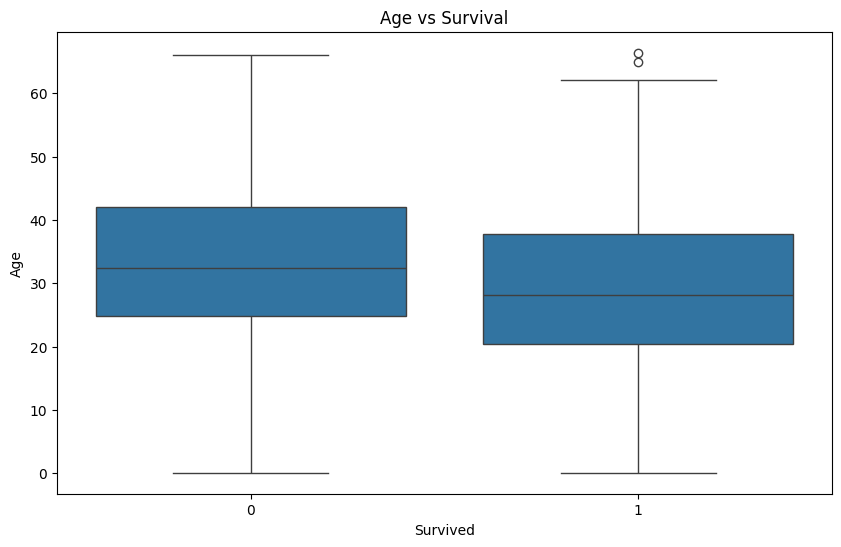

In [ ]:
# Age vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()

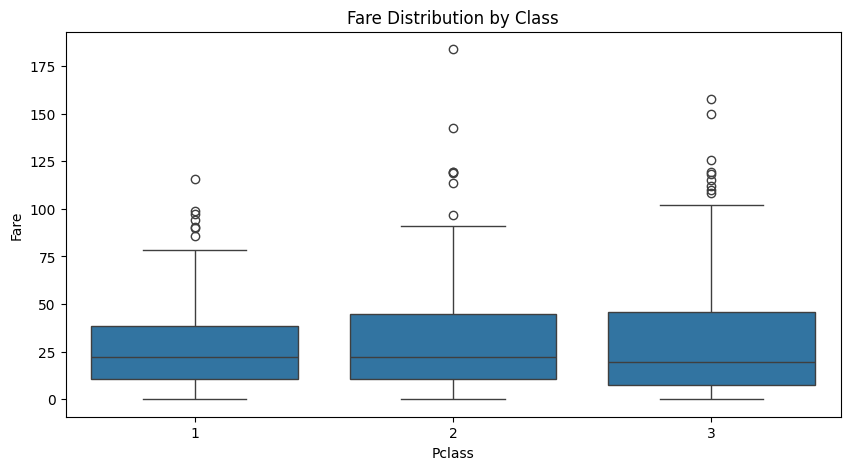

In [ ]:
# Fare vs Pclass
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Class')
plt.show()

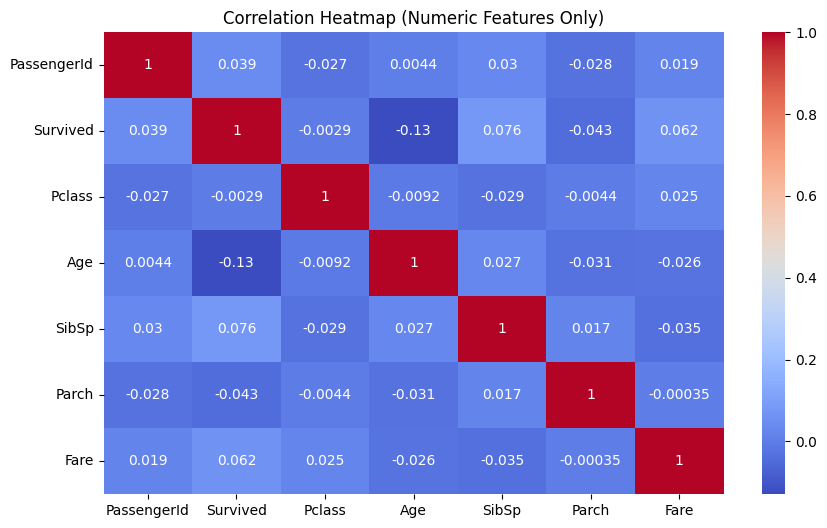

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


Pclass
1    0.414414
2    0.417219
3    0.411765
Name: Survived, dtype: float64
Survived         0         1
Pclass                      
1         0.585586  0.414414
2         0.582781  0.417219
3         0.588235  0.411765


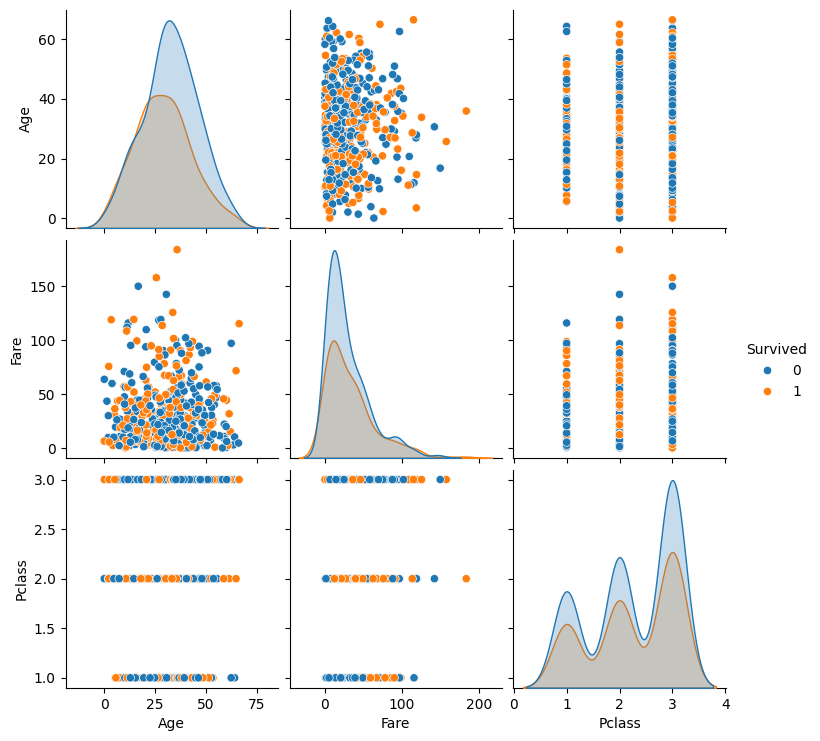

In [ ]:
# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean())

# Crosstab: Pclass vs Survived
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'))

# Pairplot of selected features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()


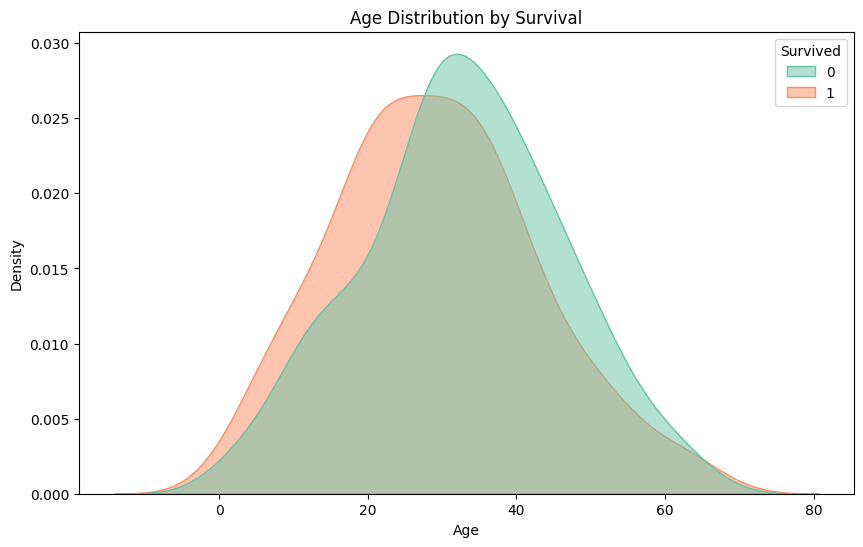

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='Set2', common_norm=False, alpha=0.5)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


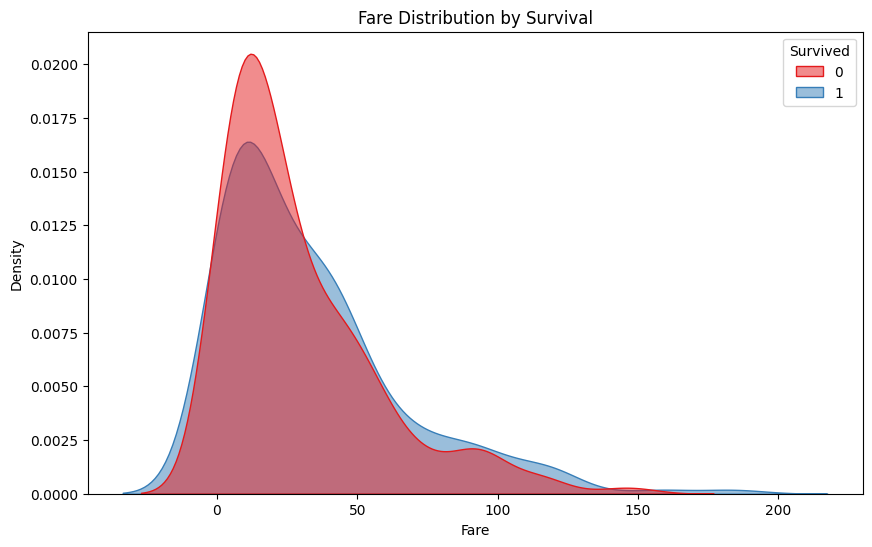

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, palette='Set1', common_norm=False, alpha=0.5)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


/tmp/ipython-input-30-3635395876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', palette='pastel')


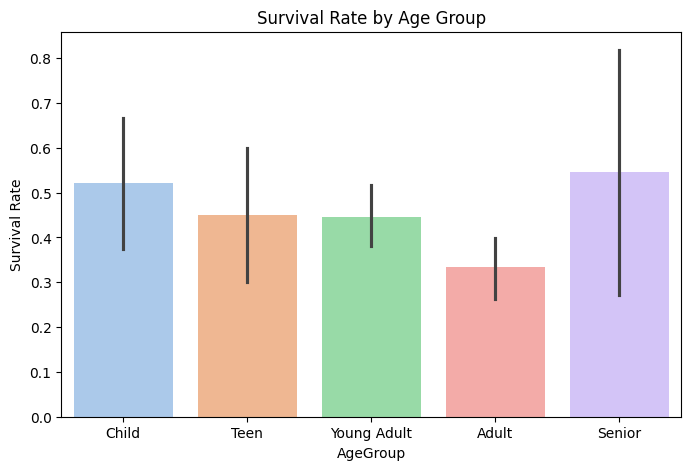

In [ ]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,100], labels=['Child','Teen','Young Adult','Adult','Senior'])

# Plot survival rate by age group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='AgeGroup', y='Survived', palette='pastel')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()


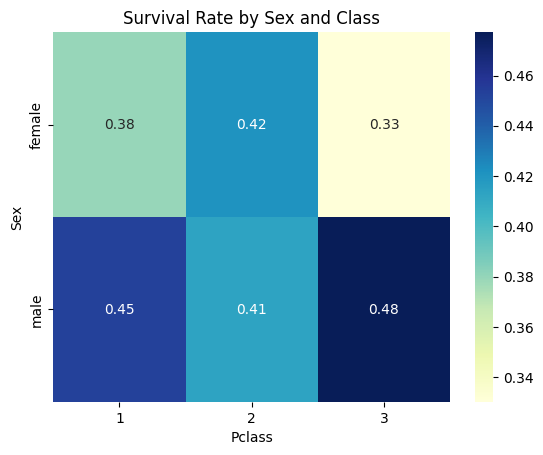

In [ ]:
# Create pivot table for heatmap
heatmap_data = pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass')

# Plot
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rate by Sex and Class')
plt.show()


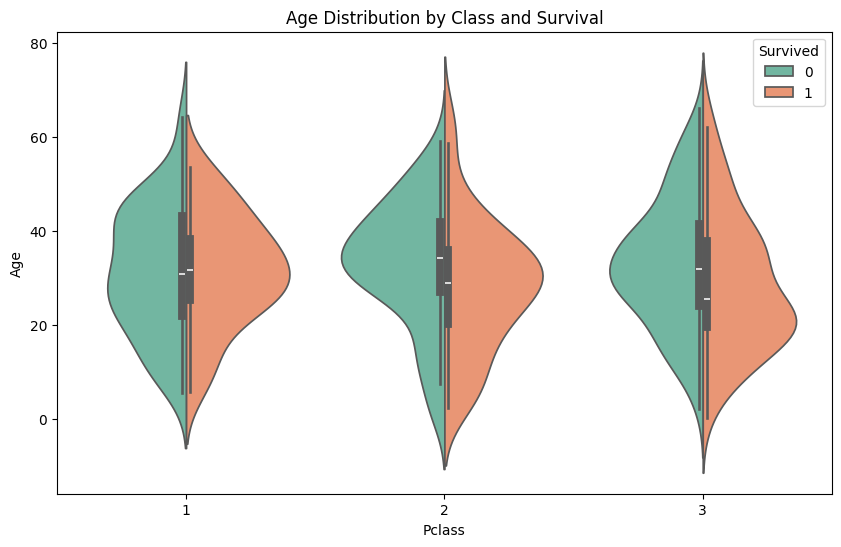

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette='Set2')
plt.title('Age Distribution by Class and Survival')
plt.show()


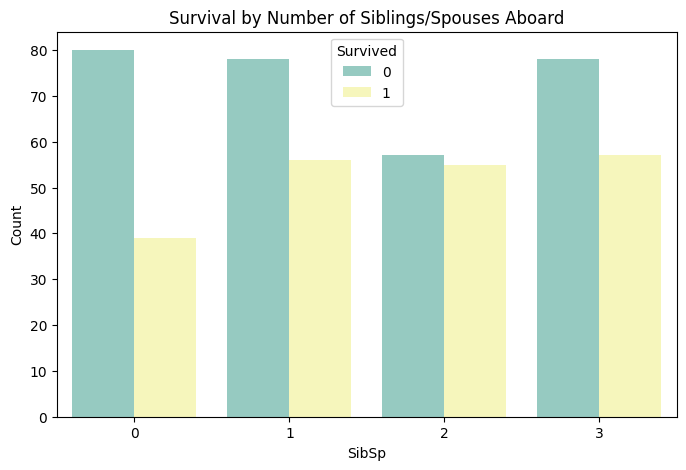

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='SibSp', hue='Survived', palette='Set3')
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()
